In [4]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

In [9]:
# load trajectory
traj = md.load('../Data/adp_md.trr', top='../Data/adp_md.gro')

In [10]:
# compute phi and psi angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

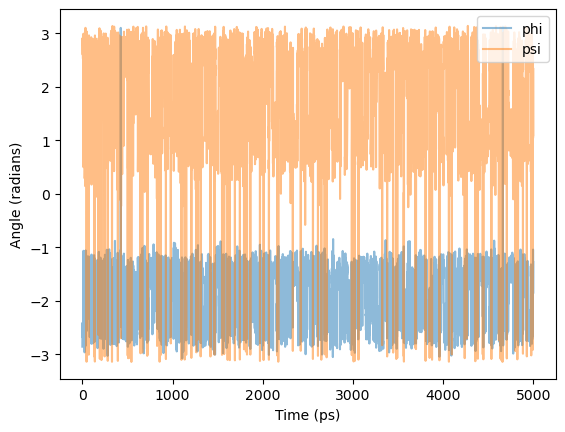

In [14]:
def plot_prop_vs_time(prop, time, legend):
    plt.plot(time, prop, label=legend, alpha=0.5)
    plt.xlabel('Time (ps)')
    plt.ylabel('Angle (radians)')
    plt.legend(loc='upper right')

# plot phi and psi angles vs time
plot_prop_vs_time(phi_angles, traj.time, 'phi')
plot_prop_vs_time(psi_angles, traj.time, 'psi')
plt.savefig('../Figures/phi_psi_time.png', dpi=300)

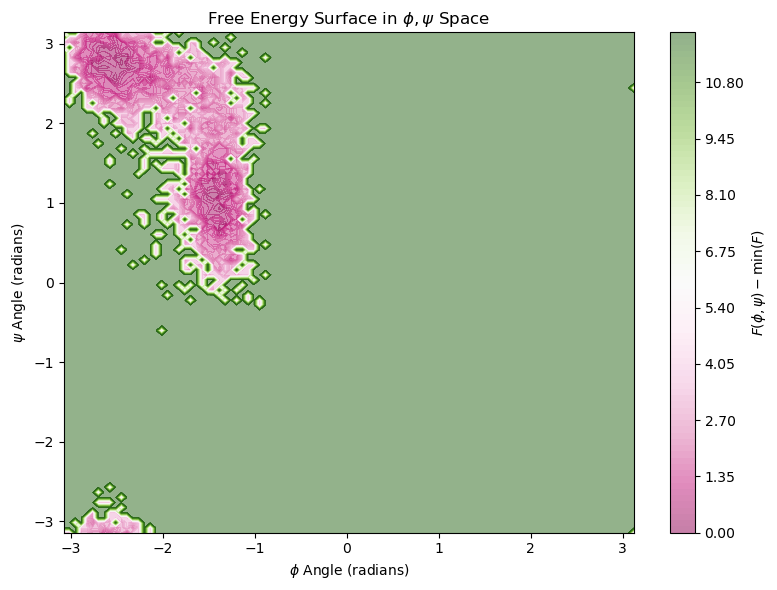

In [41]:
# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(phi_angles.reshape(-1), psi_angles.reshape(-1), bins=100, normed=True)
hist[hist == 0] = 1e-5  # Avoid log(0)

# Compute free energy
F = -np.log(hist)

# Subtract the minimum free energy
F -= np.min(F)

plt.figure(figsize=(8, 6))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.contourf(F.T, 100, cmap="PiYG", extent=extent, alpha=0.5)
plt.colorbar(label=r"$F(\phi, \psi) - \min(F)$")
plt.xlabel(r'$\phi$ Angle (radians)')
plt.ylabel(r'$\psi$ Angle (radians)')
plt.title('Free Energy Surface in $\phi, \psi$ Space')
plt.tight_layout()
plt.show()